In [39]:
from PIL import Image
from io import BytesIO
import requests
img_path = 'https://mblogthumb-phinf.pstatic.net/MjAyMjAxMjVfMjAy/MDAxNjQzMTAyOTk2NjE0.gw_H_jjBM64svaftcnheR6-mHHlmGOyrr6htAuxPETsg.8JJSQNEA5HX2WmrshjZ-VjmJWqhmgE40Qm5csIud9VUg.JPEG.minziminzi128/IMG_7374.JPG?type=w800'

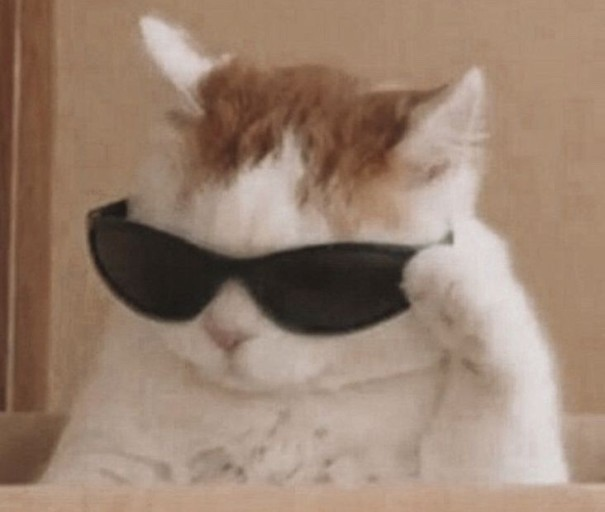

In [40]:
Image.open(BytesIO(requests.get(img_path).content))

In [41]:
key = 'b9484f9d40194da49cec72266fb0684d'
endpoint = 'https://labuser75computervision.cognitiveservices.azure.com/'

In [42]:
endpoint = endpoint +  'vision/v2.0/'

In [43]:
analyze_endpoint = endpoint + 'analyze'

detect_endpoint = endpoint + 'detect'
ocr_endpoint = endpoint + 'ocr'

In [63]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': img_path}

In [45]:
response = requests.post(analyze_endpoint, params = params, headers=headers, json=data)
response

<Response [200]>

In [46]:
result = response.json()

In [47]:
result

{'categories': [],
 'color': {'dominantColorForeground': 'Black',
  'dominantColorBackground': 'Brown',
  'dominantColors': ['Brown'],
  'accentColor': '6A4835',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['cat',
   'indoor',
   'sitting',
   'looking',
   'brown',
   'laying',
   'playing',
   'orange',
   'water',
   'sleeping',
   'mirror',
   'bed',
   'reflection',
   'bear',
   'kitchen',
   'stuffed'],
  'captions': [{'text': 'a cat sitting on top of each other',
    'confidence': 0.813406846418608}]},
 'requestId': 'f0821479-b1aa-40b6-b073-ff332ce15de6',
 'metadata': {'height': 512, 'width': 605, 'format': 'Jpeg'}}

In [54]:
result['description']['captions'][0]

{'text': 'a cat sitting on top of each other', 'confidence': 0.813406846418608}

# object detection

In [64]:
detect_response = requests.post(detect_endpoint,
                         headers = headers,
                         json = data)
detect_response

<Response [200]>

In [65]:
detect_result = detect_response.json()
detect_result

{'objects': [{'rectangle': {'x': 115, 'y': 20, 'w': 379, 'h': 242},
   'object': 'mammal',
   'confidence': 0.623,
   'parent': {'object': 'animal', 'confidence': 0.631}},
  {'rectangle': {'x': 86, 'y': 216, 'w': 360, 'h': 128},
   'object': 'Sunglasses',
   'confidence': 0.576,
   'parent': {'object': 'Glasses',
    'confidence': 0.872,
    'parent': {'object': 'Personal care', 'confidence': 0.877}}}],
 'requestId': '84fe810f-40fe-4ca4-989a-70c8a5e2d137',
 'metadata': {'height': 512, 'width': 605, 'format': 'Jpeg'}}

In [66]:
from PIL import Image, ImageDraw, ImageFont

In [69]:
image = Image.open(BytesIO(requests.get(img_path).content))

In [70]:
draw = ImageDraw.Draw(image)

In [88]:
def CreateRectangle(objectInfo):
  objects = objectInfo['objects']

  for obj in objects:
    rect = obj['rectangle']
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w, y+h)), outline = 'red')


In [89]:
CreateRectangle(detect_result)

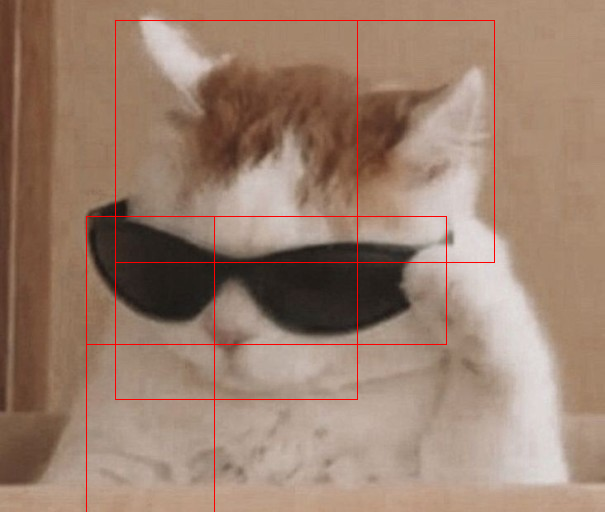

In [91]:
image